In [27]:
#pip install bert-for-tf2

In [28]:
#pip install sentencepiece

In [29]:
#pip install keras

In [30]:
#pip install --upgrade --force-reinstall tensorflow-estimator==1.15.1

In [31]:
#pip install keras

In [32]:
pip install tensorflow==2.4.0

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [33]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert

In [34]:
import pandas as pd
import re
import numpy as np
import random
import math

In [35]:
data = pd.read_csv('tatarstan_message_2.csv', sep = ',')
print(data.columns)
data = data[['categories', 'description_stem']]
data.head(3)

Index(['level_0', 'index', 'categories', 'description', 'worker',
       'description_prep', 'num_words', 'description_stem'],
      dtype='object')


,categories,description_stem
0,Благоустройство территории,трасса нижнекамск чистополь лесополоса пгт кам...
1,Благоустройство территории,двор дом ленинградский отсутствовать парковочн...
2,Содержание и ремонт муниципальных дорог,добрый день осуществляться уборка снег центр г...


In [36]:
X = [x for x in data['description_stem']]
Y = pd.get_dummies(data['categories'])
#Y = np.argmax(np.array(Y), axis = 1)
#Y =  data.categories.replace(data.categories.unique(), range(data.categories.unique().shape[0]), inplace=False) 
print(Y)
#print(data.categories.unique().shape[0])

       Cвалки  Бездомные животные  Благоустройство территории  Вода  Воздух  \
0           0                   0                           1     0       0   
1           0                   0                           1     0       0   
2           0                   0                           0     0       0   
3           0                   0                           1     0       0   
4           0                   0                           0     0       0   
...       ...                 ...                         ...   ...     ...   
23665       0                   0                           0     0       0   
23666       0                   0                           1     0       0   
23667       1                   0                           0     0       0   
23668       0                   0                           1     0       0   
23669       0                   0                           1     0       0   

       Детские сады  Доступная среда  Жилищное стро

In [37]:
data.categories.unique()

array(['Благоустройство территории',
       'Содержание и ремонт муниципальных дорог',
       'Поликлиники и больницы', 'Бездомные животные', 'Парки и скверы',
       'Мобильная связь', 'Организация дорожного движения',
       'Незаконные азартные игры', 'Санитарное состояние',
       'Нарушение в наружной рекламе', 'Работа спортивных объектов',
       'Капитальный ремонт', 'Общественный транспорт', 'Воздух',
       'Садоводческие, огороднические и дачные некоммерческие объединения',
       'Детские сады', 'Доступная среда', 'Жилищное строительство',
       'Почта', 'Вода',
       'Содержание и ремонт федеральных и республиканских дорог',
       'Cвалки', 'Работа учреждений культуры',
       'Объекты культурного наследия', 'Сельское хозяйство',
       'Цифровое телевидение'], dtype=object)

In [38]:
tokenizer = bert.bert_tokenization.FullTokenizer(vocab_file="bert_model/vocab.txt",
     do_lower_case=True)
bert_layer = hub.KerasLayer("/notebooks/bert_model",
                            trainable=False, signature='tokens' , signature_outputs_as_dict=True)
#vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
#to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
#tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [39]:
tokenizer.tokenize("don't be so judgmental")

['don', "'", 't', 'be', 'so', 'j', '##ud', '##g', '##ment', '##al']

In [40]:
tokenizer.convert_tokens_to_ids(tokenizer.tokenize("dont be so judgmental"))

[53106, 443, 11018, 27126, 263, 9037, 474, 12947, 1672]

In [41]:
def tokenize_reviews(text_reviews):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_reviews))

In [42]:
tokenized_reviews = [tokenize_reviews(str(review)) for review in X]

In [43]:
print(tokenized_reviews[0])

[30914, 70528, 2059, 932, 5850, 4659, 107394, 754, 58791, 3511, 727, 378, 87244, 11243, 732, 378, 5866, 39740, 378, 58087, 673, 73507, 816, 12737, 65511, 726, 1165, 27183, 87197, 13544, 58619]


In [44]:
from keras.preprocessing.sequence import pad_sequences
SENTENCE_LENGTH = 50

tokenized_reviews = pad_sequences(tokenized_reviews, maxlen=SENTENCE_LENGTH)
reviews_with_len = [[review, Y.iloc[i]]
                 for i, review in enumerate(tokenized_reviews)]

In [45]:
print(reviews_with_len[0])

[array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,  30914,  70528,   2059,    932,   5850,
         4659, 107394,    754,  58791,   3511,    727,    378,  87244,
        11243,    732,    378,   5866,  39740,    378,  58087,    673,
        73507,    816,  12737,  65511,    726,   1165,  27183,  87197,
        13544,  58619], dtype=int32), Cвалки                                                               0
Бездомные животные                                                   0
Благоустройство территории                                           1
Вода                                                                 0
Воздух                                                               0
Детские сады                                                         0
Доступная среда                                                      0
Жилищное строительство                

In [46]:
random.shuffle(reviews_with_len)

In [47]:
from sklearn.model_selection import train_test_split

X = np.array([part[0] for part in reviews_with_len])
Y = np.array([part[1] for part in reviews_with_len])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
# Метрики 
from sklearn.metrics import matthews_corrcoef
def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))



In [49]:
class TEXT_MODEL(tf.keras.Model):
    
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=26,
                 dropout_rate=0.1,
                 training=False,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer4 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=5,
                                        padding="valid",
                                        activation="relu")
        self.pool = layers.GlobalMaxPool1D()
        
        self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = layers.Dense(units=1, activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=model_output_classes, name='out_layer',
                                           activation="softmax")
    
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3) 
        l_4 = self.cnn_layer3(l)
        l_4 = self.pool(l_4) 
        
        concatenated = tf.concat([l_1, l_2, l_3, l_4], axis=-1) # (batch_size, 3 * cnn_filters)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        
        return model_output

In [50]:
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 256
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 26

DROPOUT_RATE = 0.2

NB_EPOCHS = 30

In [51]:
text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

Batch_size = 1024

In [52]:
text_model.compile(loss="binary_crossentropy",
                    optimizer="adam",
                    metrics=['accuracy', precision, recall, f1])

In [53]:
from keras.callbacks import ModelCheckpoint
from keras import backend as K 
checkpoint = ModelCheckpoint(r"cnn_bert_weights/CNN_Bert_classifier_1024-{epoch:02d}-{val_f1:.2f}.hdf5", # Сохраняем модель с лучшим val_f1
                             monitor='val_f1', save_best_only=True, mode='max')
history = text_model.fit(X_train, Y_train, batch_size=1024, epochs=30, validation_split=0.2, callbacks = [checkpoint])

Epoch 1/30
15/15 [==============================] - 13s 355ms/step - loss: 0.5514 - accuracy: 0.0593 - precision: 0.0106 - recall: 4.0248e-04 - f1: 7.3896e-04 - val_loss: 0.1175 - val_accuracy: 0.4583 - val_precision: 0.4310 - val_recall: 0.2861 - val_f1: 0.3439
Epoch 2/30
15/15 [==============================] - 5s 322ms/step - loss: 0.1226 - accuracy: 0.4421 - precision: 0.4460 - recall: 0.3569 - f1: 0.3881 - val_loss: 0.1082 - val_accuracy: 0.4583 - val_precision: 0.4597 - val_recall: 0.4585 - val_f1: 0.4591
Epoch 3/30
15/15 [==============================] - 5s 316ms/step - loss: 0.1122 - accuracy: 0.4177 - precision: 0.4489 - recall: 0.3120 - f1: 0.3668 - val_loss: 0.0971 - val_accuracy: 0.4583 - val_precision: 0.4611 - val_recall: 0.4568 - val_f1: 0.4590
Epoch 4/30
15/15 [==============================] - 5s 326ms/step - loss: 0.0983 - accuracy: 0.4789 - precision: 0.5238 - recall: 0.3888 - f1: 0.4456 - val_loss: 0.0872 - val_accuracy: 0.5549 - val_precision: 0.6374 - val_recall:

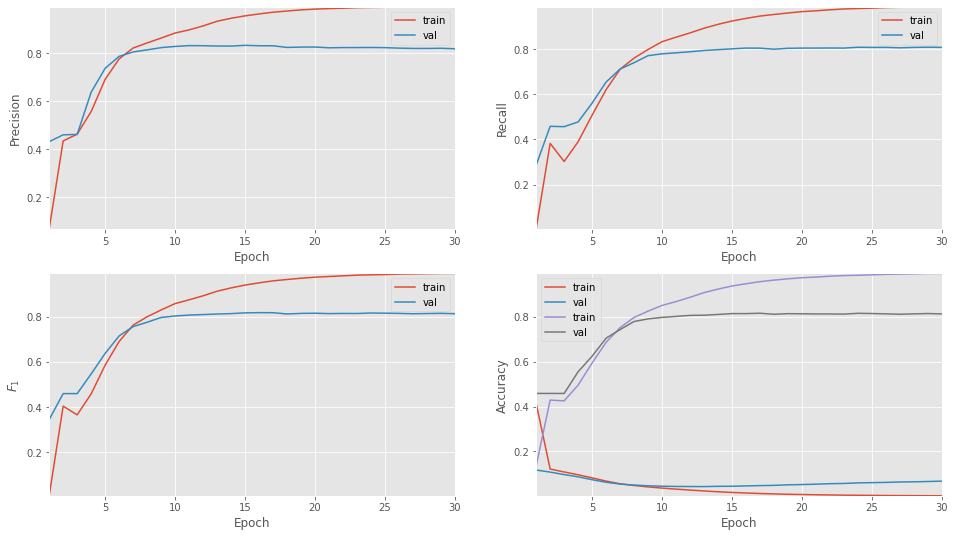

In [54]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')


def plot_metrix(ax, x1, x2, title):
    ax.plot(range(1, len(x1) + 1), x1, label='train')
    ax.plot(range(1, len(x2) + 1), x2, label='val')
    ax.set_ylabel(title)
    ax.set_xlabel('Epoch')
    ax.legend()
    ax.margins(0)


def plot_history(history):
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 9))
    ax1, ax2, ax3, ax4 = axes.ravel()

    plot_metrix(ax1, history.history['precision'], history.history['val_precision'], 'Precision')
    plot_metrix(ax2, history.history['recall'], history.history['val_recall'], 'Recall')
    plot_metrix(ax3, history.history['f1'], history.history['val_f1'], "$F_1$")
    plot_metrix(ax4, history.history['loss'], history.history['val_loss'], 'Loss')
    plot_metrix(ax4, history.history['accuracy'], history.history['val_accuracy'], 'Accuracy')

    plt.show()

plot_history(history)

In [82]:
text_model.load_weights('cnn_bert_weights/CNN_Bert_classifier_1024-16-0.82.hdf5')

In [84]:
from sklearn.metrics import classification_report
print("Оценки тестового набора:")
predicted = np.array(text_model.predict(X_test))
predicted = np.argmax(predicted, axis=1)
Y_test = np.array(Y_test)
print(classification_report(Y_test, predicted, digits=3))
print(matthews_corrcoef(Y_test, predicted))

Оценки тестового набора:
              precision    recall  f1-score   support

           0      0.821     0.397     0.535        58
           1      0.954     0.925     0.939       134
           2      0.805     0.867     0.835      2212
           3      0.000     0.000     0.000         9
           4      0.789     0.577     0.667        26
           5      1.000     0.048     0.091        21
           6      0.800     0.267     0.400        15
           7      0.000     0.000     0.000         8
           8      0.800     0.381     0.516        21
           9      1.000     0.925     0.961        40
          10      0.900     0.887     0.893       212
          11      0.000     0.000     0.000         4
          12      0.885     0.819     0.851       160
          13      0.000     0.000     0.000         3
          14      0.865     0.841     0.853       327
          15      0.615     0.386     0.474        83
          16      0.871     0.830     0.850       106
  

Batch_size = 512

In [85]:
text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

text_model.compile(loss="binary_crossentropy",
                    optimizer="adam",
                    metrics=['accuracy', precision, recall, f1])

In [86]:
from keras.callbacks import ModelCheckpoint
from keras import backend as K 
checkpoint = ModelCheckpoint(r"cnn_bert_weights/CNN_Bert_classifier_512-{epoch:02d}-{val_f1:.2f}.hdf5", # Сохраняем модель с лучшим val_f1
                             monitor='val_f1', save_best_only=True, mode='max')
history = text_model.fit(X_train, Y_train, batch_size=512, epochs=30, validation_split=0.2, callbacks = [checkpoint])

Epoch 1/30
30/30 [==============================] - 12s 364ms/step - loss: 0.4364 - accuracy: 0.1430 - precision: 0.0953 - recall: 0.0700 - f1: 0.0751 - val_loss: 0.1104 - val_accuracy: 0.4583 - val_precision: 0.4580 - val_recall: 0.4579 - val_f1: 0.4579
Epoch 2/30
30/30 [==============================] - 10s 331ms/step - loss: 0.1085 - accuracy: 0.4377 - precision: 0.4646 - recall: 0.3356 - f1: 0.3838 - val_loss: 0.0911 - val_accuracy: 0.5341 - val_precision: 0.5647 - val_recall: 0.4816 - val_f1: 0.5198
Epoch 3/30
30/30 [==============================] - 10s 330ms/step - loss: 0.0886 - accuracy: 0.5587 - precision: 0.6258 - recall: 0.4587 - f1: 0.5290 - val_loss: 0.0701 - val_accuracy: 0.6449 - val_precision: 0.7407 - val_recall: 0.5949 - val_f1: 0.6598
Epoch 4/30
30/30 [==============================] - 10s 331ms/step - loss: 0.0650 - accuracy: 0.6941 - precision: 0.7760 - recall: 0.6437 - f1: 0.7035 - val_loss: 0.0541 - val_accuracy: 0.7524 - val_precision: 0.8104 - val_recall: 0.70

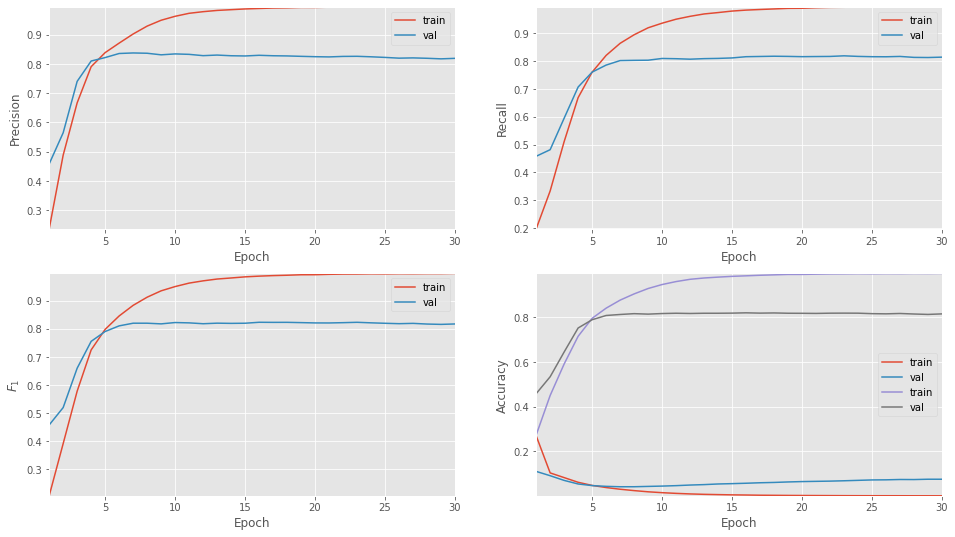

In [87]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')


def plot_metrix(ax, x1, x2, title):
    ax.plot(range(1, len(x1) + 1), x1, label='train')
    ax.plot(range(1, len(x2) + 1), x2, label='val')
    ax.set_ylabel(title)
    ax.set_xlabel('Epoch')
    ax.legend()
    ax.margins(0)


def plot_history(history):
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 9))
    ax1, ax2, ax3, ax4 = axes.ravel()

    plot_metrix(ax1, history.history['precision'], history.history['val_precision'], 'Precision')
    plot_metrix(ax2, history.history['recall'], history.history['val_recall'], 'Recall')
    plot_metrix(ax3, history.history['f1'], history.history['val_f1'], "$F_1$")
    plot_metrix(ax4, history.history['loss'], history.history['val_loss'], 'Loss')
    plot_metrix(ax4, history.history['accuracy'], history.history['val_accuracy'], 'Accuracy')

    plt.show()

plot_history(history)

In [89]:
text_model.load_weights('cnn_bert_weights/CNN_Bert_classifier_512-16-0.82.hdf5')

from sklearn.metrics import classification_report
print("Оценки тестового набора:")
predicted = np.array(text_model.predict(X_test))
predicted = np.argmax(predicted, axis=1)
Y_test = np.array(Y_test)
print(classification_report(Y_test, predicted, digits=3))
print(matthews_corrcoef(Y_test, predicted))

Оценки тестового набора:
              precision    recall  f1-score   support

           0      0.571     0.414     0.480        58
           1      0.984     0.933     0.958       134
           2      0.822     0.854     0.838      2212
           3      0.000     0.000     0.000         9
           4      0.826     0.731     0.776        26
           5      0.727     0.381     0.500        21
           6      0.692     0.600     0.643        15
           7      0.000     0.000     0.000         8
           8      0.737     0.667     0.700        21
           9      0.974     0.925     0.949        40
          10      0.918     0.896     0.907       212
          11      0.000     0.000     0.000         4
          12      0.879     0.819     0.848       160
          13      0.000     0.000     0.000         3
          14      0.863     0.844     0.853       327
          15      0.639     0.470     0.542        83
          16      0.904     0.887     0.895       106
  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Batch_size = 64

In [90]:
text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

text_model.compile(loss="binary_crossentropy",
                    optimizer="adam",
                    metrics=['accuracy', precision, recall, f1])

In [91]:
from keras.callbacks import ModelCheckpoint
from keras import backend as K 
checkpoint = ModelCheckpoint(r"cnn_bert_weights/CNN_Bert_classifier_64-{epoch:02d}-{val_f1:.2f}.hdf5", # Сохраняем модель с лучшим val_f1
                             monitor='val_f1', save_best_only=True, mode='max')
history = text_model.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2, callbacks = [checkpoint])

Epoch 1/30
237/237 [==============================] - 80s 332ms/step - loss: 0.1758 - accuracy: 0.4540 - precision: 0.4468 - recall: 0.3560 - f1: 0.3938 - val_loss: 0.0488 - val_accuracy: 0.7629 - val_precision: 0.8117 - val_recall: 0.7415 - val_f1: 0.7747
Epoch 2/30
237/237 [==============================] - 78s 329ms/step - loss: 0.0426 - accuracy: 0.8141 - precision: 0.8496 - recall: 0.7964 - f1: 0.8218 - val_loss: 0.0399 - val_accuracy: 0.8112 - val_precision: 0.8359 - val_recall: 0.7962 - val_f1: 0.8154
Epoch 3/30
237/237 [==============================] - 81s 343ms/step - loss: 0.0251 - accuracy: 0.8955 - precision: 0.9177 - recall: 0.8852 - f1: 0.9011 - val_loss: 0.0391 - val_accuracy: 0.8200 - val_precision: 0.8336 - val_recall: 0.8131 - val_f1: 0.8231
Epoch 4/30
237/237 [==============================] - 77s 323ms/step - loss: 0.0146 - accuracy: 0.9441 - precision: 0.9564 - recall: 0.9374 - f1: 0.9467 - val_loss: 0.0406 - val_accuracy: 0.8263 - val_precision: 0.8406 - val_reca

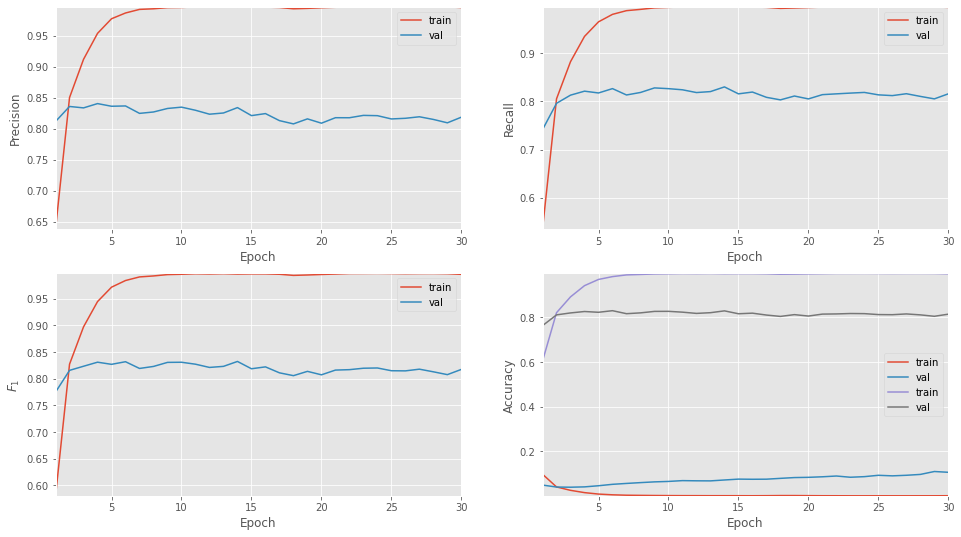

In [92]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')


def plot_metrix(ax, x1, x2, title):
    ax.plot(range(1, len(x1) + 1), x1, label='train')
    ax.plot(range(1, len(x2) + 1), x2, label='val')
    ax.set_ylabel(title)
    ax.set_xlabel('Epoch')
    ax.legend()
    ax.margins(0)


def plot_history(history):
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 9))
    ax1, ax2, ax3, ax4 = axes.ravel()

    plot_metrix(ax1, history.history['precision'], history.history['val_precision'], 'Precision')
    plot_metrix(ax2, history.history['recall'], history.history['val_recall'], 'Recall')
    plot_metrix(ax3, history.history['f1'], history.history['val_f1'], "$F_1$")
    plot_metrix(ax4, history.history['loss'], history.history['val_loss'], 'Loss')
    plot_metrix(ax4, history.history['accuracy'], history.history['val_accuracy'], 'Accuracy')

    plt.show()

plot_history(history)

In [94]:
text_model.load_weights('cnn_bert_weights/CNN_Bert_classifier_64-14-0.83.hdf5')

from sklearn.metrics import classification_report
print("Оценки тестового набора:")
predicted = np.array(text_model.predict(X_test))
predicted = np.argmax(predicted, axis=1)
Y_test = np.array(Y_test)
print(classification_report(Y_test, predicted, digits=3))
print(matthews_corrcoef(Y_test, predicted))

Оценки тестового набора:
              precision    recall  f1-score   support

           0      0.724     0.362     0.483        58
           1      0.955     0.948     0.951       134
           2      0.828     0.845     0.837      2212
           3      0.000     0.000     0.000         9
           4      0.677     0.808     0.737        26
           5      0.833     0.714     0.769        21
           6      0.393     0.733     0.512        15
           7      0.000     0.000     0.000         8
           8      0.812     0.619     0.703        21
           9      0.952     1.000     0.976        40
          10      0.911     0.915     0.913       212
          11      0.000     0.000     0.000         4
          12      0.848     0.838     0.843       160
          13      0.000     0.000     0.000         3
          14      0.881     0.835     0.857       327
          15      0.653     0.386     0.485        83
          16      0.905     0.896     0.900       106
  